In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, LinearRegression, Lasso, RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [2]:
data = pd.read_csv('dataset_case2.csv', index_col='Unnamed: 0')

In [3]:
import random
import pandas as pd

data = pd.read_csv('dataset_case2.csv', index_col='Unnamed: 0')

users = tuple(data['insta_user_id'].unique())
test_size = 20                          
test_users = random.sample(users, test_size)

df_test = data[data['insta_user_id'].isin(test_users)]
df_train = data[~data['insta_user_id'].isin(test_users)]

y_train = df_train['PERMA']
X_train = df_train.drop(['PERMA','P','E','R','M','A','image_id','user_id','insta_user_id'], axis=1)

y_test = df_test['PERMA']
X_test = df_test.drop(['PERMA','P','E','R','M','A','image_id','user_id','insta_user_id'], axis=1)

**OLS**

In [107]:
ols = LinearRegression()
cv = cross_val_score(ols, X_train, y_train, cv=10)  
print('cross validation scores : ', cv)

cross validation scores :  [-0.12488042 -0.05734528 -0.36619347 -0.67035078 -0.31058864 -0.43625828
 -0.26014096 -0.07326505  0.1465941   0.01542616]


In [112]:
ols_model = ols.fit(X_train, y_train)
print('Train score: ', ols.score(X_train, y_train))
print('Test score: ', ols.score(X_test, y_test))

Train score:  0.09448125998495349
Test score:  -0.04276418664136128


In [189]:
#biggest features
ols_coefficients = pd.DataFrame(ols_model.coef_).transpose()
ols_coefficients['feature_names']=(X_train.columns)
ols_coefficients.nlargest(20, columns=0)

# only filters as most important features!!!

,0,feature_names
28,2.315152,Maven
14,2.002370,Dogpatch
45,1.503490,Vesper
10,1.305262,Brooklyn
20,1.189725,Helena
26,0.828294,Lo-fi
32,0.804098,Normal
48,0.773886,X-Pro II
43,0.716640,Unknown
13,0.698380,Crema


In [151]:
len(ols_coefficients)

79

Text(0.5,1,'OLS coefficients')

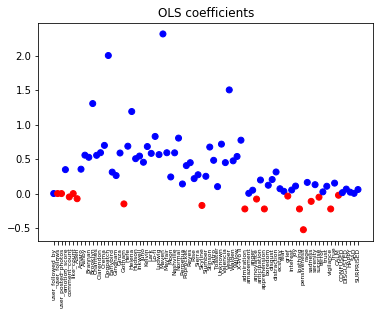

In [161]:
plt.scatter(range(X_train.shape[1]), ols_model.coef_, c=np.sign(ols_model.coef_), cmap="bwr_r")
plt.xticks(np.arange(79), X_train.columns, fontsize=6, rotation=90)
plt.title('OLS coefficients')

**Ridge**

In [175]:
param_grid = {'alpha': np.logspace(-3,15, 14)}
grid = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.00000e-03, 2.42446e-02, 5.87802e-01, 1.42510e+01, 3.45511e+02,
       8.37678e+03, 2.03092e+05, 4.92388e+06, 1.19378e+08, 2.89427e+09,
       7.01704e+10, 1.70125e+12, 4.12463e+13, 1.00000e+15])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

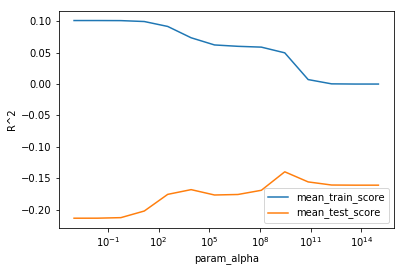

In [176]:
results = pd.DataFrame(grid.cv_results_)
results.plot('param_alpha', 'mean_train_score')
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())

plt.legend()
plt.ylabel('R^2')
plt.xscale("log")

In [103]:
grid.cv_results_['mean_train_score']

array([0.09745762, 0.08787697, 0.07805659, 0.06349676, 0.06003984,
       0.05865176, 0.05801584, 0.05048072, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [31]:
grid.cv_results_['mean_test_score']

array([-0.21371963, -0.21371963, -0.2137196 , -0.21371925, -0.21371513,
       -0.21366763, -0.21322538, -0.20953714, -0.19376326, -0.17338324,
       -0.16738034, -0.17423647, -0.17785042, -0.17461913])

In [105]:
print(grid.best_params_)
print('best test score: ', grid.best_score_)

{'alpha': 70.17038286703823}
best test score:  -0.1382783277565097


In [179]:
print('best estimator train score :' , grid.score(X_train, y_train))
print('best estimator test score :' , grid.score(X_test, y_test))

best estimator train score : 0.04847096908431647
best estimator test score : -0.035937005704625546


In [181]:
#biggest features
ridge_coefficients = pd.DataFrame(grid.best_estimator_.coef_).transpose()
ridge_coefficients['feature_names']=(X_train.columns)
ridge_coefficients.nlargest(5, columns=0)

,0,feature_names
0,3.102421e-05,user_followed_by
32,2.344074e-07,Normal
72,1.416900e-07,True
62,1.015826e-07,joy
78,9.268319e-08,SURPRISED


Text(0.5,1,'best Ridge coefficients')

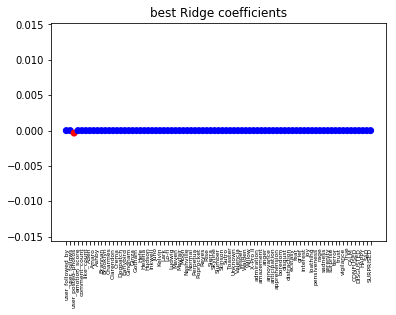

In [169]:
plt.scatter(range(X_train.shape[1]), grid.best_estimator_.coef_, c=np.sign(grid.best_estimator_.coef_), cmap="bwr_r")
plt.xticks(np.arange(79), X_train.columns, fontsize=6, rotation=90)
plt.title('best Ridge coefficients')

**Lasso**

In [182]:
param_grid = {'alpha': np.logspace(-3,6, 14)}
grid = GridSearchCV(Lasso(), param_grid, cv=10, return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.00000e-03, 4.92388e-03, 2.42446e-02, 1.19378e-01, 5.87802e-01,
       2.89427e+00, 1.42510e+01, 7.01704e+01, 3.45511e+02, 1.70125e+03,
       8.37678e+03, 4.12463e+04, 2.03092e+05, 1.00000e+06])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

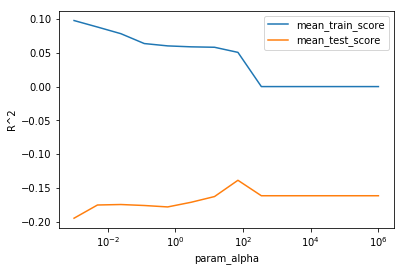

In [183]:
results = pd.DataFrame(grid.cv_results_)
results.plot('param_alpha', 'mean_train_score')
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())

plt.legend()
plt.ylabel('R^2')
plt.xscale("log")


In [184]:
print(grid.best_params_)
print('best test score: ', grid.best_score_)

{'alpha': 70.17038286703823}
best test score:  -0.1382783277565097


In [185]:
print('best estimator train score :' , grid.score(X_train, y_train))
print('best estimator test score :' , grid.score(X_test, y_test))

best estimator train score : 0.04831278632001623
best estimator test score : -0.02163101868284678


In [186]:
#biggest features
lasso_coefficients = pd.DataFrame(grid.best_estimator_.coef_)
lasso_coefficients['feature_names']=(X_train.columns)
lasso_coefficients.nlargest(5, columns=0)

,0,feature_names
0,0.0,user_followed_by
1,-0.0,user_follows
3,0.0,emotion_score
4,-0.0,comment_count
5,-0.0,like_count
